# Feature Selection

{{ badge }}


Feature selection is a process where you automatically or manually select features in your data that contribute most to the prediction variable or output in which you are interested.

There are many ways to perform feature selection. Some methods include:


- Removing features with low variance removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

- Using a correlation matrix to select features that are highly correlated with the output variable.

- Using a statistical tests (e.g., $x^2$) to measure the statistical significance of each feature in relation to the label. 

- Using a recursive feature elimination algorithm to automatically select features that are most relevant to the output variable.

- Select From Model is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_) after fitting. The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument.

Why is  Feature Selection important?

In the machine learning process, feature selection is used to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones. This is why feature selection is important.

Three key benefits of feature selection are:

- Decreases over-fitting  

   Fewer redundant data means fewer chances of  making decisions based on noise.

- Improves Accuracy  

  Less misleading data means better modeling accuracy.

- Reduces Training Time

  Less data means quicker algorithms.

There are many feature selection techniques supported by Scikit Learn. We will go through some of them and if you wish to learn more visit [Scikit Learn's Documentation](https://scikit-learn.org/stable/modules/feature_selection.html).

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

mkdir: cannot create directory ‘/root/.kaggle’: File exists
weather-dataset-rattle-package.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip  /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, model_selection, feature_selection, svm, metrics, pipeline, preprocessing
from tqdm import tqdm 

#### Load the Dataset

In [ ]:
# Read the data using pandas 
data=pd.read_csv('/content/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#### Preprocessing the Dataset

In [ ]:
# Get the number of missing values
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Drop the following columns 
# ['Location','Date']
data.drop(columns=['Location','Date'],inplace =True)

In [ ]:
# Drop the missing values 
data.dropna(inplace=True)
# Reset the indexes of DataFrame
data.reset_index(inplace=True,drop=True)

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


No     43993
Yes    12427
Name: RainTomorrow, dtype: int64


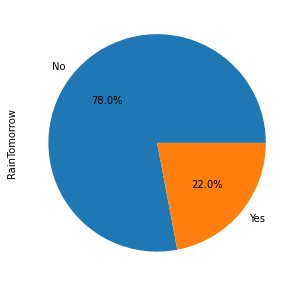

In [ ]:
print(data.RainTomorrow.value_counts())
data.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')


## Balance the Dataset


In [ ]:
# create new dataset the balance 
new_dataset=data[data.RainTomorrow=='Yes']
new_dataset=new_dataset.append(data[data.RainTomorrow=='No'].sample(n=14000))

# Reset indexes
new_dataset.reset_index(inplace=True,drop=True)

No     14000
Yes    12427
Name: RainTomorrow, dtype: int64


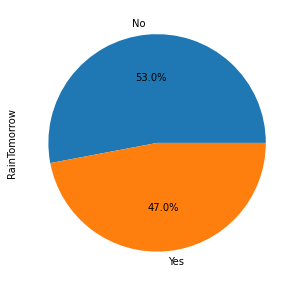

In [ ]:
print(new_dataset.RainTomorrow.value_counts())
new_dataset.RainTomorrow.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26427 entries, 0 to 26426
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        26427 non-null  float64
 1   MaxTemp        26427 non-null  float64
 2   Rainfall       26427 non-null  float64
 3   Evaporation    26427 non-null  float64
 4   Sunshine       26427 non-null  float64
 5   WindGustDir    26427 non-null  object 
 6   WindGustSpeed  26427 non-null  float64
 7   WindDir9am     26427 non-null  object 
 8   WindDir3pm     26427 non-null  object 
 9   WindSpeed9am   26427 non-null  float64
 10  WindSpeed3pm   26427 non-null  float64
 11  Humidity9am    26427 non-null  float64
 12  Humidity3pm    26427 non-null  float64
 13  Pressure9am    26427 non-null  float64
 14  Pressure3pm    26427 non-null  float64
 15  Cloud9am       26427 non-null  float64
 16  Cloud3pm       26427 non-null  float64
 17  Temp9am        26427 non-null  float64
 18  Temp3p

In [ ]:
# Create tokenizer function to convert the labels to numerical values
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id 
        id_word[id] = word
    return word_id,id_word


In [ ]:
# Get the label to id and id to label dictdictionary 
RainTomorrow_id,id_RainTomorrow = tokenizer(new_dataset.RainTomorrow)
# Convert the labels to ids using the label_id dictionary 
new_dataset.RainTomorrow.replace(RainTomorrow_id,inplace=True)




# Get the word to id and id to word dictdictionary 
RainToday_id,id_RainToday = tokenizer(new_dataset.RainToday)
# Convert the word to ids using the label id dictionary 
new_dataset.RainToday.replace(RainToday_id,inplace=True)



# Get the word to id and id to word dictdictionary 
WindDir3pm_id,id_WindDir3pm = tokenizer(new_dataset.WindDir3pm)
# Convert the word to ids using the label id dictionary 
new_dataset.WindDir3pm.replace(WindDir3pm_id,inplace=True)


# Get the word to id and id to word dictdictionary 
WindDir9am_id,id_WindDir9am = tokenizer(new_dataset.WindDir9am)
# Convert the word to ids using the label id dictionary 
new_dataset.WindDir9am.replace(WindDir9am_id,inplace=True)


# Get the word to id and id to word dictdictionary 
WindGustDir_id,id_WindGustDir = tokenizer(new_dataset.WindGustDir)
# Convert the word to ids using the label id dictionary 
new_dataset.WindGustDir.replace(WindGustDir_id,inplace=True)


In [ ]:
# split the dataset to x,y 
x= new_dataset.drop(columns=['RainTomorrow'])
y=new_dataset.RainTomorrow.to_numpy()

In [ ]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,21.4,37.5,0.0,14.8,6.9,0,43.0,0,0,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0
1,21.8,30.7,0.0,8.0,5.9,1,56.0,1,1,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,0
2,20.3,36.0,18.0,8.2,10.5,2,94.0,2,2,13.0,7.0,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,1
3,23.6,40.4,0.6,11.8,12.2,2,54.0,3,3,9.0,11.0,42.0,17.0,1008.4,1005.0,1.0,2.0,29.9,38.7,0
4,16.8,23.3,0.6,8.0,2.3,3,63.0,3,4,35.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26422,8.4,14.9,0.2,2.0,4.5,1,50.0,11,2,20.0,20.0,66.0,56.0,1004.1,1005.1,3.0,7.0,10.9,13.6,0
26423,18.7,35.0,0.0,11.2,13.3,2,35.0,4,3,9.0,17.0,47.0,28.0,1016.8,1013.0,0.0,0.0,23.1,33.9,0
26424,6.2,25.8,0.0,5.0,10.8,4,35.0,4,4,26.0,15.0,56.0,25.0,1014.8,1010.3,1.0,1.0,14.7,24.7,0
26425,7.8,19.6,0.0,6.6,5.0,5,28.0,14,5,11.0,15.0,60.0,67.0,1021.2,1018.3,6.0,7.0,14.9,17.9,0


In [ ]:
# Normalize the features using Standard Scaler
x_normalizer = preprocessing.StandardScaler()
x_norm = x_normalizer.fit_transform(x)


In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

## Feature Selection Methods

### Univariate Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

selection routines as objects that implement the transform method:

We will be using the [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class from Scikit Learn which removes all but the  highest $k$ scoring features using some scoring method based on a statistical significance test like $x^2$ (chi-square).





### $Chi^2$

A **chi-square** ($χ^2$) statistic is a test that is used to measure how expectations compare to actual observed data or model results.

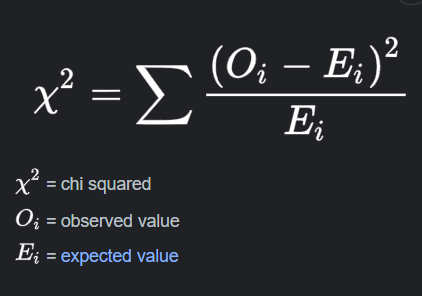

In [ ]:
# We need to make sure features must be non-negative.
chi_new_dataset = new_dataset[(new_dataset.MinTemp>=0)& (new_dataset.Temp9am>=0)]
# split the dataset to x,y 
chi_x= chi_new_dataset.drop(columns=['RainTomorrow'])
chi_y=chi_new_dataset.RainTomorrow.to_numpy()

In [ ]:
# Define the feature selector by selecing the scoring function and the number of features to select
feature_selector = feature_selection.SelectKBest(feature_selection.chi2, k=10)

# Use fit and transform to train the feature selector and return the best 10 features
feature_selector.fit(chi_x,chi_y)
new_x = feature_selector.transform(x_norm)

# New X will have 10 features instead of 20
new_x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  "X does not have valid feature names, but"


(26427, 10)

In [ ]:
# Get the score of chi2 model 
feature_selector.scores_

array([6.60572889e+02, 1.89455579e+03, 3.69471399e+04, 1.82715060e+03,
       1.67180140e+04, 3.10608252e+01, 8.30930068e+03, 4.73514389e+01,
       2.13048131e+00, 1.10186936e+03, 1.01369376e+03, 1.46875167e+04,
       5.87878744e+04, 1.10254922e+02, 8.90009308e+01, 6.56024121e+03,
       8.19678239e+03, 7.33364400e+01, 2.95728437e+03, 2.04142646e+03])

In [ ]:
# Get the best best score columns  
x.loc[:,feature_selector.get_support()]

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,37.5,0.0,6.9,43.0,34.0,29.0,7.0,6.0,34.1,0
1,30.7,0.0,5.9,56.0,71.0,63.0,7.0,7.0,27.3,0
2,36.0,18.0,10.5,94.0,89.0,50.0,7.0,4.0,33.4,1
3,40.4,0.6,12.2,54.0,42.0,17.0,1.0,2.0,38.7,0
4,23.3,0.6,2.3,63.0,66.0,53.0,7.0,7.0,22.4,0
...,...,...,...,...,...,...,...,...,...,...
26422,14.9,0.2,4.5,50.0,66.0,56.0,3.0,7.0,13.6,0
26423,35.0,0.0,13.3,35.0,47.0,28.0,0.0,0.0,33.9,0
26424,25.8,0.0,10.8,35.0,56.0,25.0,1.0,1.0,24.7,0
26425,19.6,0.0,5.0,28.0,60.0,67.0,6.0,7.0,17.9,0


Scikit Learn includes additional scoring functions like:

- For classification: `chi2`, `f_classif`, `mutual_info_classif`
- For regression: `f_regression`, `mutual_info_regression`

## Training & Evaluating

In [ ]:
print(f"Training model on {new_x.shape[-1]} features")
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
                                                        new_x, y, train_indices, test_indices)

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred,average='weighted'))
    recall.append( metrics.recall_score(y_test, y_pred,average='weighted'))
    f1_score.append(metrics.f1_score(y_test, y_pred,average='weighted'))

Training model on 10 features


10it [03:26, 20.64s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.788498,0.788771,0.788498,0.788585
1,0.791903,0.791853,0.791903,0.791874
2,0.788120,0.788286,0.788120,0.788180
3,0.784714,0.785480,0.784714,0.784870
4,0.791903,0.792297,0.791903,0.792011
5,0.790768,0.790636,0.790768,0.790631
6,0.796443,0.796797,0.796443,0.796543
7,0.797200,0.797420,0.797200,0.797273
8,0.797200,0.797138,0.797200,0.797162
9,0.794930,0.794804,0.794930,0.794790


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.792168
precision    0.792348
recall       0.792168
F1           0.792192
dtype: float64

**Warning:** Beware not to use a regression scoring function with a classification problem, you will get useless results.


# Feature selection using Select From Model

[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_) or via an importance_getter callable after fitting. 

The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter. 

Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. 

In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

In [ ]:
# Normalize the features 
x_normalizer = preprocessing.StandardScaler()
x_normalizer.fit(x )
x_norm = x_normalizer.transform(x)

## Define the Linear Model

In [ ]:
lsvc = svm.SVC(kernel = 'linear',max_iter=-1)


## Use the Trained Linear Model to Get the Best Features

In [ ]:
# Create hte selection form linear support vector machine 
feature_selector = feature_selection.SelectFromModel(lsvc,prefit=False,max_features=10)
# select the best features 
feature_selector.fit(x_norm,y)


new_x =feature_selector.transform(x_norm)# get the best features using the pretrained model
new_x.shape

(26427, 5)

In [ ]:
# Show the columns that selected from the feature selector
selected_col = feature_selector.get_support()
x.loc[:,selected_col]

,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Pressure3pm
0,6.9,43.0,29.0,1013.1,1009.6
1,5.9,56.0,63.0,1008.6,1006.2
2,10.5,94.0,50.0,1008.6,1006.7
3,12.2,54.0,17.0,1008.4,1005.0
4,2.3,63.0,53.0,1013.8,1012.2
...,...,...,...,...,...
26422,4.5,50.0,56.0,1004.1,1005.1
26423,13.3,35.0,28.0,1016.8,1013.0
26424,10.8,35.0,25.0,1014.8,1010.3
26425,5.0,28.0,67.0,1021.2,1018.3


## Training & Evaluating

In [ ]:
print(f"Training model on {new_x.shape[-1]} features")
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        new_x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred,average='weighted'))
    recall.append( metrics.recall_score(y_test, y_pred,average='weighted'))
    f1_score.append(metrics.f1_score(y_test, y_pred,average='weighted'))

Training model on 5 features


10it [02:49, 17.00s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.797579,0.797510,0.797579,0.797535
1,0.795687,0.795562,0.795687,0.795547
2,0.788498,0.788573,0.788498,0.788530
3,0.794552,0.794854,0.794552,0.794643
4,0.804767,0.805227,0.804767,0.804879
5,0.804389,0.804336,0.804389,0.804357
6,0.801362,0.801337,0.801362,0.801348
7,0.800984,0.801116,0.800984,0.801033
8,0.801362,0.801267,0.801362,0.801288
9,0.800605,0.800496,0.800605,0.800425


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.798978
precision    0.799028
recall       0.798978
F1           0.798959
dtype: float64

**Warning:** Beware not to use a regression scoring function with a classification problem, you will get useless results.


# Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients/weights of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as `coef_`, `feature_importances_`). Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



## Define the Linear Model

In [ ]:
lsvc = svm.SVC(kernel='linear',max_iter=-1)


## Use the Trained Linear Model to Get the Best Features

In [ ]:
# Create hte selection form linear support vector machine 
feature_selector = feature_selection.RFE(lsvc,n_features_to_select=10)
# select the best features 
feature_selector.fit(x_norm,y)


new_x =feature_selector.transform(x_norm)# get the best features using the pretrained model
new_x.shape

(26427, 10)

In [ ]:
# Show the columns that selected from the feature selector
selected_col = feature_selector.get_support()
x.loc[:,selected_col]

,MinTemp,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainToday
0,21.4,6.9,43.0,9.0,29.0,1013.1,1009.6,6.0,34.1,0
1,21.8,5.9,56.0,19.0,63.0,1008.6,1006.2,7.0,27.3,0
2,20.3,10.5,94.0,7.0,50.0,1008.6,1006.7,4.0,33.4,1
3,23.6,12.2,54.0,11.0,17.0,1008.4,1005.0,2.0,38.7,0
4,16.8,2.3,63.0,35.0,53.0,1013.8,1012.2,7.0,22.4,0
...,...,...,...,...,...,...,...,...,...,...
26422,8.4,4.5,50.0,20.0,56.0,1004.1,1005.1,7.0,13.6,0
26423,18.7,13.3,35.0,17.0,28.0,1016.8,1013.0,0.0,33.9,0
26424,6.2,10.8,35.0,15.0,25.0,1014.8,1010.3,1.0,24.7,0
26425,7.8,5.0,28.0,15.0,67.0,1021.2,1018.3,7.0,17.9,0


## Training & Evaluating

In [ ]:
print(f"Training model on {new_x.shape[-1]} features")
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        new_x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred,average='weighted'))
    recall.append( metrics.recall_score(y_test, y_pred,average='weighted'))
    f1_score.append(metrics.f1_score(y_test, y_pred,average='weighted'))

Training model on 10 features


10it [02:57, 17.74s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.800984,0.800951,0.800984,0.800965
1,0.796065,0.795996,0.796065,0.796021
2,0.796822,0.797157,0.796822,0.796918
3,0.796065,0.797440,0.796065,0.796241
4,0.806281,0.807208,0.806281,0.806432
5,0.809308,0.809203,0.809308,0.809188
6,0.810821,0.810901,0.810821,0.810853
7,0.808551,0.808569,0.808551,0.808559
8,0.806659,0.806752,0.806659,0.806696
9,0.808173,0.808069,0.808173,0.808069


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.803973
precision    0.804225
recall       0.803973
F1           0.803995
dtype: float64

# How to Get Best Number Features to Select

The 1,000,000 $ question is how to choose the right number of feature to select. One of the best method to do that is by using cross validation on different numbers of feature.

In [ ]:
# Define the cross validation method
kfold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42)
# Define empty dictionary for records
# k equal to number Features to Select
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}

for k in tqdm(range(len(x.columns))):
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create the linear model
    lsvc = svm.SVC(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvc,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)
    # get the new fetures 
    new_x = feature_selector.transform(x_norm)

    # Evaluate svm on the features for defiant k values form 1 to 20
    for train_indexes,test_indexes in kfold.split(new_x,y):

        x_train,x_test,y_train,y_test = train_test_split(new_x,y,train_indexes,test_indexes,)

        model = svm.SVC()
        model.fit(x_train,y_train)
        pred = model.predict(x_test) 


        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))



    best_k['k'].append(k)
    best_k['f1_score'].append( np.mean(f1_score))
    best_k['recall_score'].append(np.mean( recall_score))
    best_k['precision_score'].append( np.mean(precision_score))

    

100%|██████████| 20/20 [2:18:14<00:00, 414.72s/it]


In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(best_k)
scores_df

,k,f1_score,recall_score,precision_score
0,1,0.735687,0.705429,0.768718
1,2,0.763470,0.757929,0.769127
2,3,0.796665,0.795786,0.797613
3,4,0.797475,0.794714,0.800318
4,5,0.810369,0.810929,0.809890
5,6,0.813085,0.812786,0.813467
6,7,0.814843,0.814429,0.815352
7,8,0.815705,0.813429,0.818082
8,9,0.813962,0.813786,0.814288
9,10,0.814227,0.811214,0.817433
